# Final Project
Callum Anderson | Anderc47 | 400318668

In [183]:
import tensorflow as tf
from autograd import numpy as np
import pandas as pd

from tensorflow.keras import models
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

print('IMPORTED')

IMPORTED


## Importing the data

In [184]:
#IMporting the data form the file
X_data = np.loadtxt('Iris_data.txt', delimiter=',', usecols = (0,1,2,3))
Iris_names = np.loadtxt('Iris_data.txt', dtype='str',   delimiter=',', usecols = 4)

In [185]:
#Creating an labels array for the iris names
#vector labels for each iris
setosa = [1,0,0] 
versicolor = [0,1,0]
virginica = [0,0,1]

#idexing each iris from the list of names
setosa_index = np.argwhere(Iris_names == 'setosa')
versicolor_index = np.argwhere(Iris_names == 'versicolor')
virginica_index =  np.argwhere(Iris_names == 'virginica')

#creating the new array of labels
Y_shape = [len(Iris_names), 3]
Y_data = np.zeros((Y_shape))
Y_data[setosa_index] = setosa
Y_data[versicolor_index] = versicolor
Y_data[virginica_index] = virginica

#Thus the Y_data is the labels for Iris'

## Dividing data into training and testing 

In [186]:
#creating random indexes to randomize the data split
random_index = np.random.permutation(len(X_data))

#assigning the random values to train/test indexes
train_index, test_index = np.array_split(random_index, 2) 

#creating the testing and training vectors
X_train = X_data[train_index]
X_test = X_data[test_index]
Y_train = Y_data[train_index]
Y_test = Y_data[test_index]

print(X_train.shape,'\t',Y_train.shape)

(75, 4) 	 (75, 3)


## Visualizing The Original Data

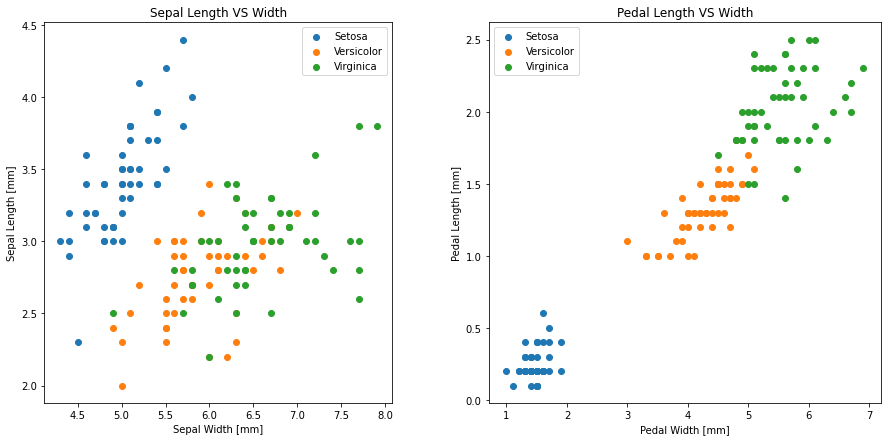

In [187]:
#defining the data to be plotted
setosa_data = X_data[setosa_index]
versicolor_data = X_data[versicolor_index]
virginica_data = X_data[virginica_index]

#plotting the data
gs = gridspec.GridSpec(2,19)
plt.figure(figsize = (15,7))

#sepal length vs width
sepal = plt.subplot(gs[:,0:8])
plt.ylabel('Sepal Length [mm]')
plt.xlabel('Sepal Width [mm]')
plt.title('Sepal Length VS Width')
sepal.scatter(setosa_data[:,:,0],setosa_data[:,:,1], label = 'Setosa')
sepal.scatter(versicolor_data[:,:,0],versicolor_data[:,:,1], label = 'Versicolor')
sepal.scatter(virginica_data[:,:,0],virginica_data[:,:,1], label = 'Virginica')
plt.legend()


# pedal length vs width
pedal = plt.subplot(gs[:,10:19])
plt.ylabel('Pedal Length [mm]')
plt.xlabel('Pedal Width [mm]')
plt.title('Pedal Length VS Width')
pedal.scatter(setosa_data[:,:,2],setosa_data[:,:,-1], label = 'Setosa')
pedal.scatter(versicolor_data[:,:,2],versicolor_data[:,:,-1], label = 'Versicolor')
pedal.scatter(virginica_data[:,:,2],virginica_data[:,:,-1], label = 'Virginica')
plt.legend()

## Creating the network models

In [188]:
#creating the one layer model
one_layer_model = models.Sequential([    
    layers.Dense(3, input_shape=(4, ), activation='sigmoid')])

one_layer_model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
one_layer_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [189]:
#creating the two layer model
two_layer_model = models.Sequential([    
    layers.Dense(15, input_shape=(4, ), activation='sigmoid'),
    layers.Dense(3,activation='softmax')
    ])

two_layer_model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
two_layer_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 15)                75        
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 48        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [190]:
#creating the three layer model
three_layer_model = models.Sequential([    
    layers.Dense(10, input_shape=(4, ), activation='sigmoid'),
    layers.Dense(20,activation='relu'),
    layers.Dense(3,activation='softmax')
    ])

three_layer_model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
three_layer_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_29 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 63        
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


## Training and testing

In [191]:
# Fit the one layer model using our training data
one_layer_history = one_layer_model.fit(X_train, Y_train, 
          validation_data=(X_test,Y_test),
          epochs=50, 
          batch_size=1, 
          verbose=1)
print('Completed first model\n\n')

# Fit the two layer model using our training data
two_layer_history = two_layer_model.fit(X_train, Y_train, 
          validation_data=(X_test,Y_test),
          epochs=50, 
          batch_size=1, 
          verbose=1)
print('Completed second model\n\n')

# Fit the three layer model using our training data
three_layer_history = three_layer_model.fit(X_train, Y_train, 
          validation_data=(X_test,Y_test),
          epochs=50, 
          batch_size=1, 
          verbose=1)
print('Completed third model\n\n')

Epoch 1/50
75/75 [==============================] - 0s 2ms/step - loss: 1.0751 - accuracy: 0.2933 - val_loss: 0.9409 - val_accuracy: 0.3733
Epoch 2/50
75/75 [==============================] - 0s 1ms/step - loss: 0.9933 - accuracy: 0.2933 - val_loss: 0.8919 - val_accuracy: 0.3733
Epoch 3/50
75/75 [==============================] - 0s 1ms/step - loss: 0.9452 - accuracy: 0.2933 - val_loss: 0.8647 - val_accuracy: 0.3733
Epoch 4/50
75/75 [==============================] - 0s 1ms/step - loss: 0.9152 - accuracy: 0.2933 - val_loss: 0.8468 - val_accuracy: 0.3733
Epoch 5/50
75/75 [==============================] - 0s 1ms/step - loss: 0.8887 - accuracy: 0.2933 - val_loss: 0.8274 - val_accuracy: 0.3733
Epoch 6/50
75/75 [==============================] - 0s 1ms/step - loss: 0.8516 - accuracy: 0.3200 - val_loss: 0.8019 - val_accuracy: 0.5200
Epoch 7/50
75/75 [==============================] - 0s 989us/step - loss: 0.8162 - accuracy: 0.5200 - val_loss: 0.7815 - val_accuracy: 0.5333
Epoch 8/50
75/75 [

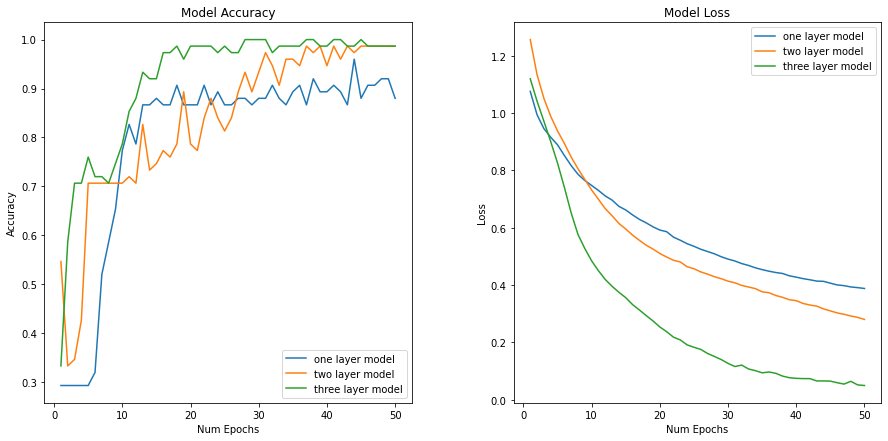

In [192]:
#plotting the data from the 3 networks
xint = np.arange(1,101)
gs = gridspec.GridSpec(2,18)
plt.figure(figsize = (15,7))

#accuracy
accuracy = plt.subplot(gs[:,0:8])
plt.ylabel('Accuracy')
plt.xlabel('Num Epochs')
plt.title('Model Accuracy')
accuracy.plot(x_int,one_layer_history.history['accuracy'], label = 'one layer model')
accuracy.plot(x_int,two_layer_history.history['accuracy'], label = 'two layer model')
accuracy.plot(x_int,three_layer_history.history['accuracy'], label = 'three layer model')
plt.legend()

#loss
loss = plt.subplot(gs[:,10:18])
plt.ylabel('Loss')
plt.xlabel('Num Epochs')
plt.title('Model Loss')
loss.plot(x_int,one_layer_history.history['loss'], label = 'one layer model')
loss.plot(x_int,two_layer_history.history['loss'], label = 'two layer model')
loss.plot(x_int,three_layer_history.history['loss'], label = 'three layer model')
plt.legend()

In [193]:
def Iris_Prediction(data):
    #predicting the data using the model
    predictions = three_layer_model.predict(data)
    
    #empty list for the datas
    setosa_data = []
    versicolor_data = []
    virginica_data = []
    
    for i in range(len(predictions)):
        
        #
        if predictions[i][0] > predictions[i][1] and predictions[i][0] > predictions[i][2]:
            setosa_data.append(data[i])

        elif predictions[i][1] > predictions[i][0] and predictions[i][1] > predictions[i][2]:
            versicolor_data.append(data[i])

        else:
            virginica_data.append(data[i])
        
    
    return np.array(setosa_data), np.array(versicolor_data), np.array(virginica_data)


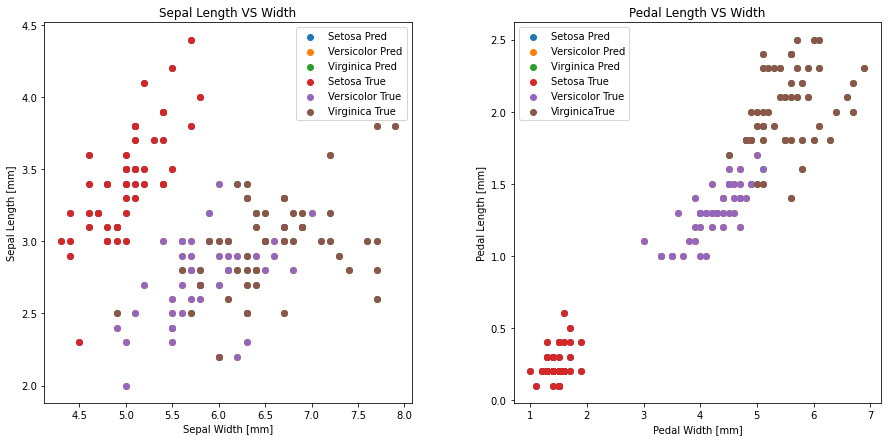

In [194]:
#using the function to create the predicted data
setosa_pred , versicolor_pred, virginica_pred = Iris_Prediction(X_data)

#plotting the predicted VS original data
gs = gridspec.GridSpec(2,18)
plt.figure(figsize = (15,7))

#sepal length vs width
sepal = plt.subplot(gs[:,0:8])
plt.ylabel('Sepal Length [mm]')
plt.xlabel('Sepal Width [mm]')
plt.title('Sepal Length VS Width')


sepal.scatter(setosa_pred[:,0],setosa_pred[:,1], label = 'Setosa Pred')
sepal.scatter(versicolor_pred[:,0],versicolor_pred[:,1], label = 'Versicolor Pred')
sepal.scatter(virginica_pred[:,0],virginica_pred[:,1], label = 'Virginica Pred')

sepal.scatter(setosa_data[:,:,0],setosa_data[:,:,1], label = 'Setosa True')
sepal.scatter(versicolor_data[:,:,0],versicolor_data[:,:,1], label = 'Versicolor True')
sepal.scatter(virginica_data[:,:,0],virginica_data[:,:,1], label = 'Virginica True')
plt.legend()


# pedal length vs width
pedal = plt.subplot(gs[:,10:19])
plt.ylabel('Pedal Length [mm]')
plt.xlabel('Pedal Width [mm]')
plt.title('Pedal Length VS Width')
pedal.scatter(setosa_pred[:,2],setosa_pred[:,-1], label = 'Setosa Pred')
pedal.scatter(versicolor_pred[:,2],versicolor_pred[:,-1], label = 'Versicolor Pred')
pedal.scatter(virginica_pred[:,2],virginica_pred[:,-1], label = 'Virginica Pred')

pedal.scatter(setosa_data[:,:,2],setosa_data[:,:,-1], label = 'Setosa True')
pedal.scatter(versicolor_data[:,:,2],versicolor_data[:,:,-1], label = 'Versicolor True')
pedal.scatter(virginica_data[:,:,2],virginica_data[:,:,-1], label = 'VirginicaTrue')


plt.legend()
plt.show()